In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
X, y = make_regression(n_samples=2000, n_features=20, noise=15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
configs = [
    {"name": "No subsample, constant LR=0.1", "lr": 0.1, "subsample": 1.0, "lr_schedule": None},
    {"name": "Subsample=0.8, constant LR=0.1", "lr": 0.1, "subsample": 0.8, "lr_schedule": None},
    {"name": "Subsample=0.8, decreasing LR", "lr": 0.1, "subsample": 0.8, "lr_schedule": "decrease"},
]

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

results = {}

for cfg in configs:
    print(f"Running: {cfg['name']}")
    n_estimators = 200
    val_mse_list = []
    learning_rate = cfg["lr"]

    for i in range(1, n_estimators + 1):
        # If LR schedule is 'decrease', reduce learning rate gradually
        lr = learning_rate / np.sqrt(i) if cfg["lr_schedule"] == "decrease" else learning_rate

        model = GradientBoostingRegressor(
            n_estimators=i,
            learning_rate=lr,
            subsample=cfg["subsample"],
            max_depth=3,
            random_state=42,
        )

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        val_mse_list.append(mse)

    results[cfg["name"]] = val_mse_list

Running: No subsample, constant LR=0.1
Running: Subsample=0.8, constant LR=0.1


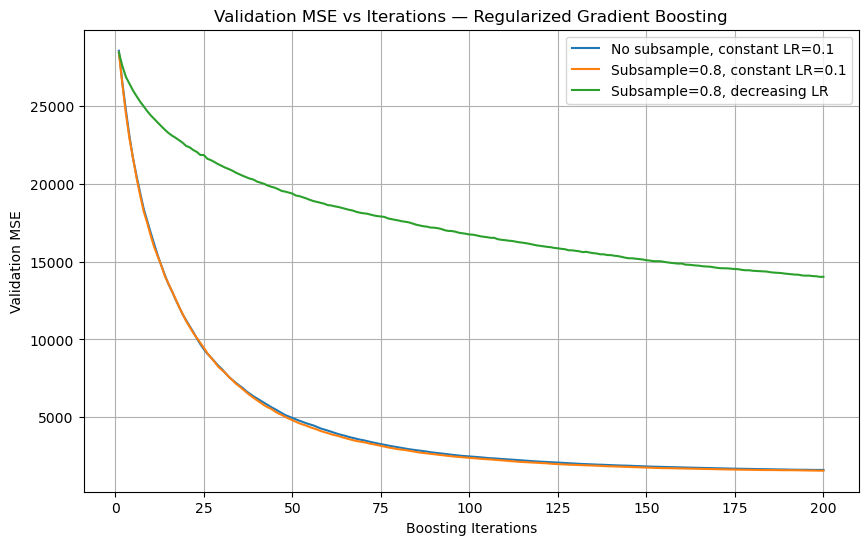

In [ ]:
plt.figure(figsize=(10, 6))
for name, mse_values in results.items():
    plt.plot(range(1, len(mse_values) + 1), mse_values, label=name)

plt.title("Validation MSE vs Iterations — Regularized Gradient Boosting")
plt.xlabel("Boosting Iterations")
plt.ylabel("Validation MSE")
plt.legend()
plt.grid(True)
plt.show()